In [20]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import os

In [13]:
input_size = 784
hidden_sizes = [500]
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001

In [3]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


In [4]:
print(len(train_dataset))  # 60000
print(len(test_dataset))   # 10000
print(len(train_loader))   # 600
print(len(test_loader))    # 100

60000
10000
600
100


In [5]:
image, label = iter(train_loader).next()
print(type(image))   # <class 'torch.FloatTensor'>
print(type(label))   # <class 'torch.LongTensor'>
print(image.size())  # torch.Size([100, 1, 28, 28])
print(label.size())  # torch.Size([100])

<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


(-0.5, 145.5, 145.5, -0.5)

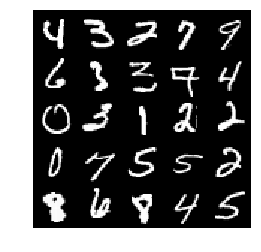

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    npimg = img.numpy()
    # [c, h, w] => [h, w, c]
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

images, labels = iter(train_loader).next()
images, labels = images[:25], labels[:25]
imshow(torchvision.utils.make_grid(images, nrow=5, padding=1))
plt.axis('off')

In [11]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MultiLayerPerceptron, self).__init__()
        
        self.relu = nn.ReLU()
        self.input_layer = nn.Linear(input_size, hidden_size[0])
        self.hidden_layers = []
        
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
        
        self.output_layer = nn.Linear(hidden_size[-1], num_classes)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = self.relu(x)
        
        x = self.output_layer(x)
        
        return x
        

In [14]:
model = MultiLayerPerceptron(input_size, hidden_sizes, num_classes)

image, label = iter(train_loader).next()

print("befire view:", image.size())
image = image.view(-1, 28 * 28)
print("after view:", image.size())
model(Variable(image))

befire view: torch.Size([100, 1, 28, 28])
after view: torch.Size([100, 784])


Variable containing:
-0.0570 -0.0479 -0.0834  ...  -0.0898 -0.0535 -0.1333
-0.1476  0.0249  0.0194  ...   0.0582 -0.1939 -0.1018
-0.1780 -0.0872  0.0149  ...   0.0331 -0.1280 -0.1088
          ...             ⋱             ...          
-0.0637  0.0184  0.0005  ...  -0.0736 -0.1513 -0.2257
-0.0332  0.0431  0.0028  ...   0.0232 -0.1010 -0.0891
-0.0845  0.0050  0.0181  ...  -0.0301 -0.0057 -0.0617
[torch.FloatTensor of size 100x10]

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
def train(train_loader):
    model.train()
    running_loss = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        running_loss += loss.data[0]
        
        loss.backward()
        optimizer.step()
        
    train_loss = running_loss / len(train_loader)
    
    return train_loss

def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    
    for batch_idxx, (images, labels) in enumerate(test_loader):
        images = Variable(images.view(-1, 28 * 28), volatile=True)
        labels = Variable(labels, volatile=True)
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        running_loss += loss.data[0]
        
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels.data).sum()
        total += labels.size(0)
        
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    
    return val_loss, val_acc

loss_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)
    
    print('epoch %d, loss: %.4f, val_loss: %.4f, val_acc: %.4f' % (epoch, loss, val_loss, val_acc))
    
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 2.0618, val_loss: 1.9690, val_acc: 0.6995
epoch 1, loss: 1.8792, val_loss: 1.7685, val_acc: 0.7413
epoch 2, loss: 1.6735, val_loss: 1.5538, val_acc: 0.7665
epoch 3, loss: 1.4659, val_loss: 1.3501, val_acc: 0.7875
epoch 4, loss: 1.2786, val_loss: 1.1756, val_acc: 0.8040
epoch 5, loss: 1.1230, val_loss: 1.0352, val_acc: 0.8210
epoch 6, loss: 0.9993, val_loss: 0.9251, val_acc: 0.8311
epoch 7, loss: 0.9021, val_loss: 0.8388, val_acc: 0.8373
epoch 8, loss: 0.8255, val_loss: 0.7704, val_acc: 0.8452
epoch 9, loss: 0.7643, val_loss: 0.7156, val_acc: 0.8532
epoch 10, loss: 0.7146, val_loss: 0.6709, val_acc: 0.8572
epoch 11, loss: 0.6737, val_loss: 0.6334, val_acc: 0.8621
epoch 12, loss: 0.6394, val_loss: 0.6023, val_acc: 0.8645
epoch 13, loss: 0.6104, val_loss: 0.5756, val_acc: 0.8687
epoch 14, loss: 0.5855, val_loss: 0.5524, val_acc: 0.8719
epoch 15, loss: 0.5639, val_loss: 0.5326, val_acc: 0.8752
epoch 16, loss: 0.5450, val_loss: 0.5150, val_acc: 0.8776
epoch 17, loss: 0.5283, 

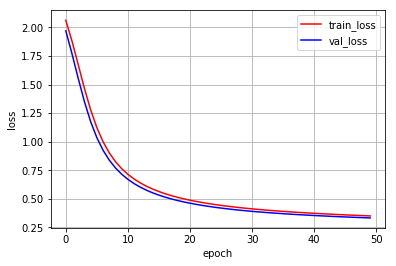

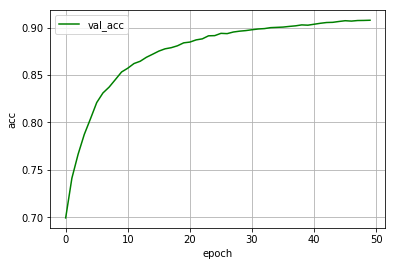

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot learning curve
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid()